In [3]:
# Arrary and stuff 
import numpy as np
# Linear algebra solvers from scipy
import scipy.linalg as la
# Basic plotting routines from the matplotlib library 
import matplotlib.pyplot as plt

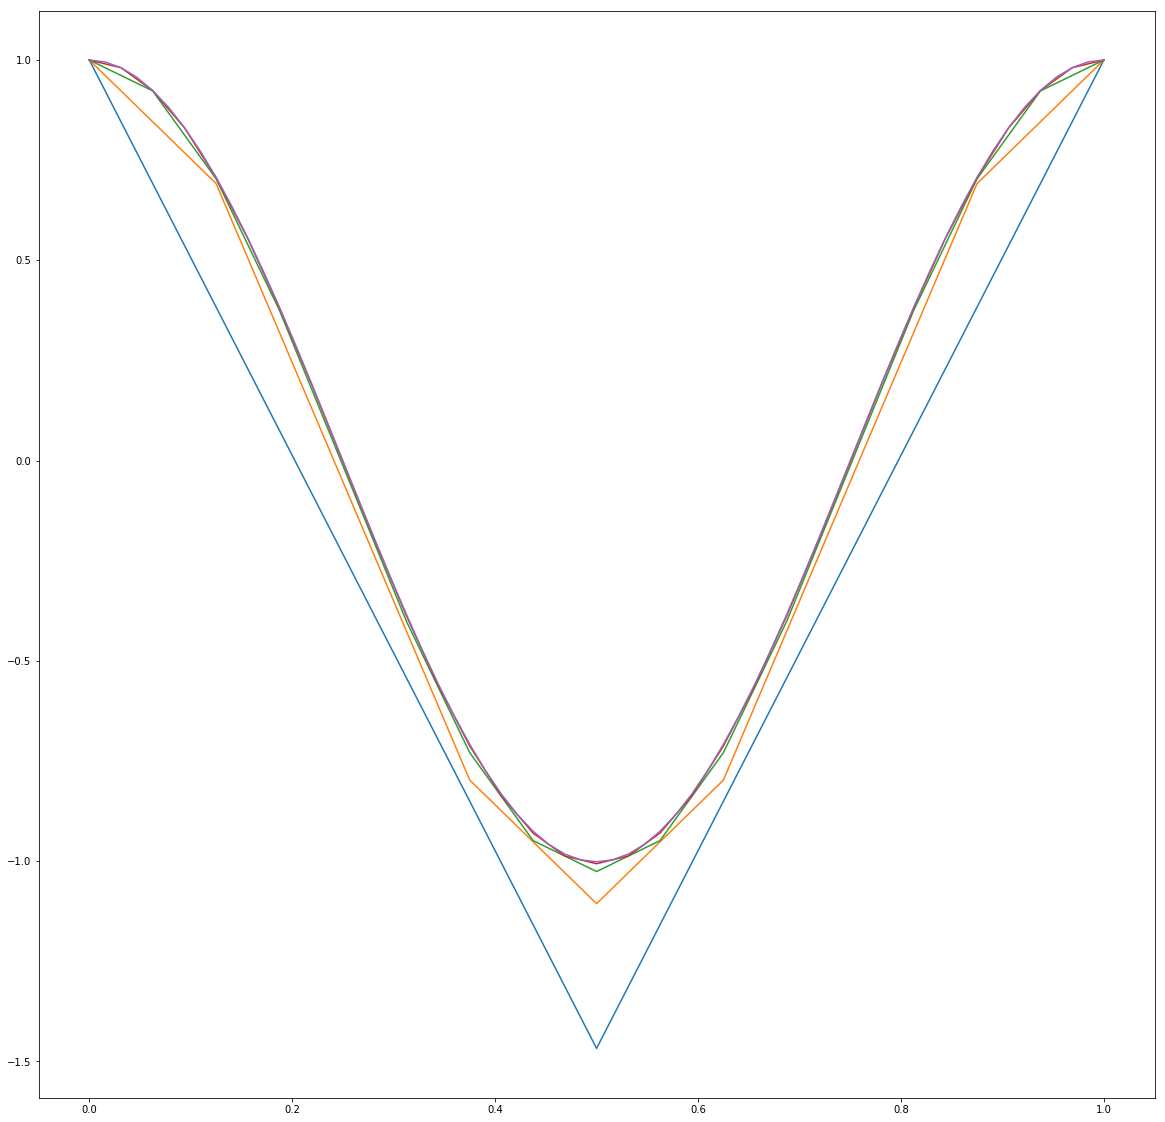

<Figure size 432x288 with 0 Axes>

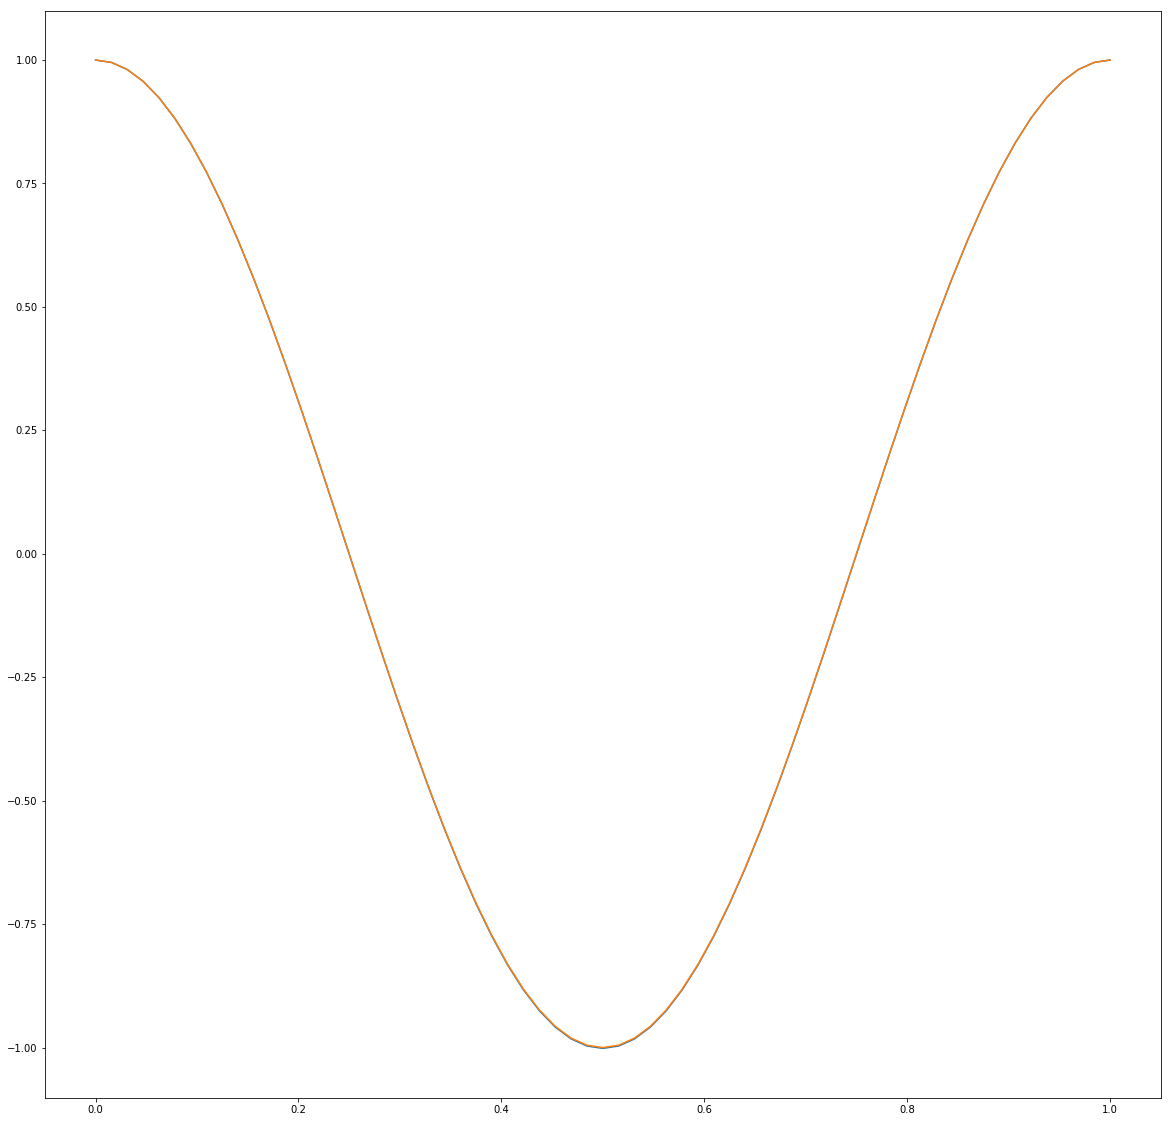

In [22]:
# Number of equally spaced subintervals
N = [4,8,16,32,64]
plt.figure(figsize=(20,20))
for j in range(len(N)):
    # Mesh size
    h = 1/N[j] #Important! In Python 2 you needed to write 1.0 to prevent integer divsion
    # Define N+1 grid points via linspace which is part of numpy now aliased as np 
    x = np.linspace(0,1,N[j]+1)
    A = np.zeros((N[j]+1, N[j]+1))

    # Define tridiagonal part of A by for rows 1 to N-1
    for i in range(1, N[j]):
        A[i, i-1] = -1
        A[i, i+1] = -1
        A[i, i] = 2

    F = (h**2)*((2*np.pi)**2)*np.cos(2*np.pi*x)
    
    # Left boundary
    A[0,0] = 1
    F[0] = 1

    # Right boundary
    A[N[j],N[j]] = 1
    F[N[j]] = 1
    
    
    U = la.solve(A, F)
    #  "x-r" means mark data points as "x", connect them by a line and use red color
    plt.plot(x, U, "-")

plt.figure()    
plt.figure(figsize=(20,20))
u = np.cos(2*np.pi*x)
plt.plot(x, U, "-")
plt.plot(x, u, "-")

    

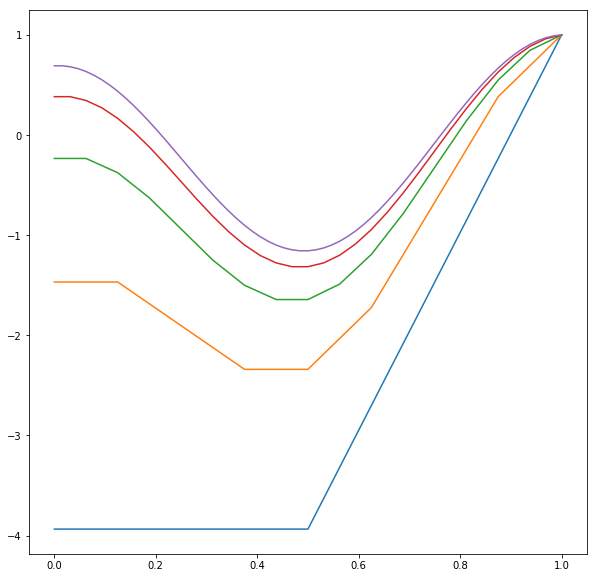

In [56]:
# Number of equally spaced subintervals
N = [4,8,16,32,64]
plt.figure(figsize=(10,10))
for j in range(len(N)):
    # Mesh size
    h = 1/N[j] #Important! In Python 2 you needed to write 1.0 to prevent integer divsion
    # Define N+1 grid points via linspace which is part of numpy now aliased as np 
    x = np.linspace(0,1,N[j]+1)
    A = np.zeros((N[j]+1, N[j]+1))

    # Define tridiagonal part of A by for rows 1 to N-1
    for i in range(1, N[j]):
        A[i, i-1] = -1
        A[i, i+1] = -1
        A[i, i] = 2

    F = (h**2)*((2*np.pi)**2)*np.cos(2*np.pi*x)
    
    # Left boundary
    A[0,0] = 1
    A[0,1] = -1
    F[0] = 0

    # Right boundary
    A[N[j],N[j]] = 1
    F[N[j]] = 1
    
    
    U = la.solve(A, F)
    #  "x-r" means mark data points as "x", connect them by a line and use red color
    plt.plot(x, U, "-")
    

In [20]:
# 3 c) Problem is NOT well posed

[1.0, 0.9999999999999997, 1.0000000000000007, 1.0000000000000016, 1.000000000000014]


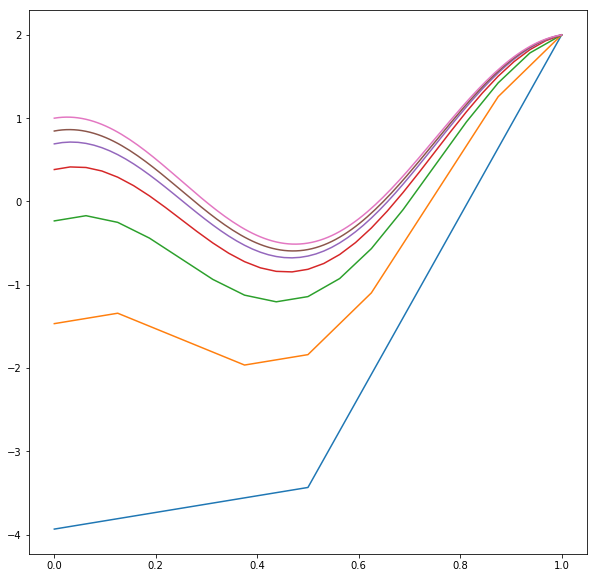

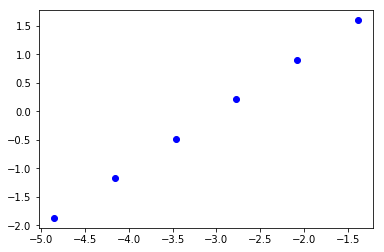

In [72]:
# Number of equally spaced subintervals
N = [4,8,16,32,64,128]
plt.figure(figsize=(10,10))
E = [] # Error list
EOC = [] # Experimental k

for j in range(len(N)):
    s = 0
    # Mesh size
    h = 1/N[j] #Important! In Python 2 you needed to write 1.0 to prevent integer divsion
    # Define N+1 grid points via linspace which is part of numpy now aliased as np 
    x = np.linspace(0,1,N[j]+1)
    A = np.zeros((N[j]+1, N[j]+1))

    # Define tridiagonal part of A by for rows 1 to N-1
    for i in range(1, N[j]):
        A[i, i-1] = -1
        A[i, i+1] = -1
        A[i, i] = 2

    F = (h**2)*((2*np.pi)**2)*np.cos(2*np.pi*x)
    
    # Left boundary
    A[0,0] = 1
    A[0,1] = -1
    F[0] = -h

    # Right boundary
    A[N[j],N[j]] = 1
    F[N[j]] = 2
    
    U = la.solve(A, F)
    #  "x-r" means mark data points as "x", connect them by a line and use red color
    plt.figure(1)
    plt.plot(x, U, "-")
    
    u = x + np.cos(2*np.pi*x)
    
    diff = u-U # Compute difference

    E.append(max(diff))
    plt.figure(2)
    plt.plot(np.log(1/N[j]),np.log(max(diff)),'bo')

plt.figure(1)
plt.plot(x, u, "-") # Plot analytical in fig 1

for i in range(len(E)-1):
    EOC.append(np.log(E[i]/E[i+1])/np.log(2))

print(EOC)

